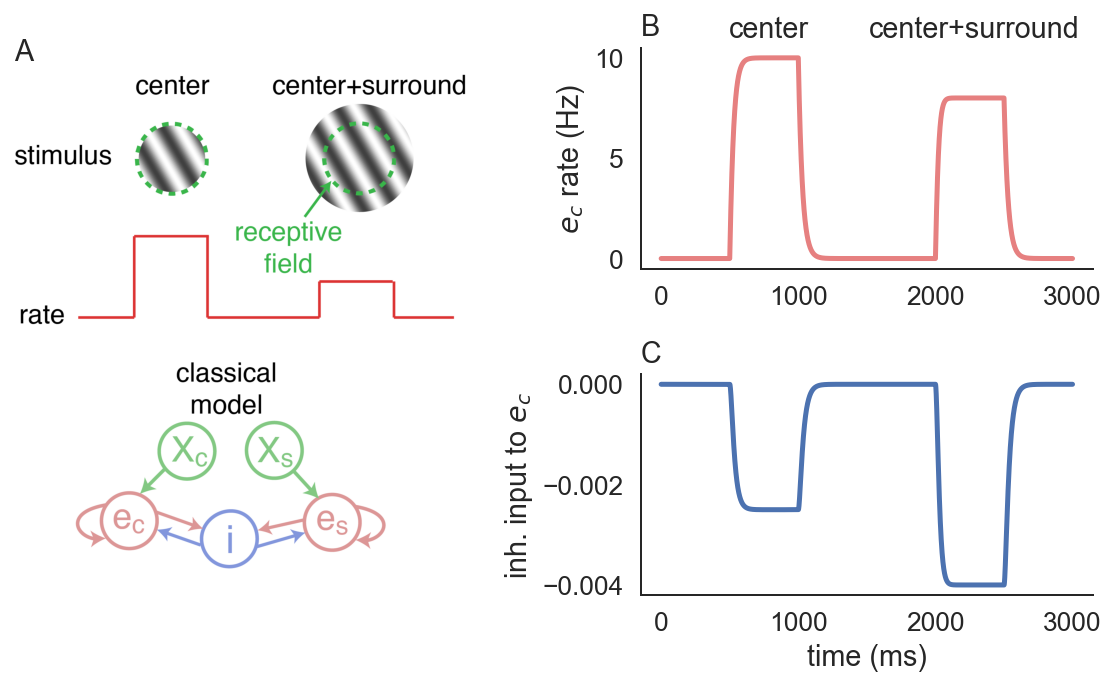

In [3]:
###############################################
## Import packages and specify some settings ##
###############################################
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# This makes plots show up and look nice
%matplotlib inline
sns.set(context='paper',style='white',font_scale=1.5,rc={"lines.linewidth":2.5})
sns.set_palette('muted')
%config InlineBackend.figure_format = 'retina'

###############################################
###############################################

### First do the classical model

# Discretized time
T=3000
dt=.5
time=np.arange(0,T,dt)

# Define network params. 
# The w's are dimensionless
# Let's interpret time in ms
# and r in 1/ms=kHz.
wee=.25
wei=-.5
wie=.5
wii=0
Xe=10/1000
Xi=0/1000
taue=30
taui=10

# Build matrix and vector forms
W=np.array([[wee,0,wei],[0,wee,wei],[wie,wie,wii]])
X=np.zeros((3,len(time)))
tau=np.array([taue,taue,taui])

# The times at which each stimulus turn on/off
tCenterOn=500
tCenterOff=1000
tSurrOn=2000
tSurrOff=2500

# Make stimulus
C=np.zeros(len(time))
S=np.zeros(len(time))
C[int(tCenterOn/dt):int(tCenterOff/dt)]=1
C[int(tSurrOn/dt):int(tSurrOff/dt)]=1
S[int(tSurrOn/dt):int(tSurrOff/dt)]=1
X[0,:]=C*Xe
X[1,:]=S*Xe

# Define f-I curve
def f(I):
    return (I)*(I>0)

# Euler loop
r=np.zeros((3,len(time)))
for i in range(len(time)-1):
    r[:,i+1]=r[:,i]+dt*(-r[:,i]+f(W@r[:,i]+X[:,i]))/tau




# Make figure
plt.subplots(figsize=(8,5))


plt.subplot(1,2,1)
# Get image for plot
try: 
    im = plt.imread('./ImageFiles/SurroundSuppDiagram1.png')
except:
    try:
        url = "https://raw.githubusercontent.com/RobertRosenbaum/ModelingNeuralCircuits/master/CodeFromBook/ImageFiles/SurroundSuppDiagram1.png"
        file = np.DataSource().open(url)
        im = plt.imread(file.name)
    except:
        im = 1.0+np.zeros([100,100,3],dtype=np.uint8)
plt.imshow(im,interpolation='hanning')
plt.axis('off')
plt.title('A',loc='left')


plt.subplot(2,2,2)
plt.plot(time,1000*r[0,:],color=[.9,.5,.5])
plt.text((tCenterOn+tCenterOff)/2+35,11,"center",ha='center')
plt.text((tSurrOn+tSurrOff)/2+35,11,"center+surround",ha='center')
#plt.xlabel('time (ms)')
plt.ylabel(r'$e_c$ rate (Hz)')
plt.title('B',loc='left')
sns.despine()

plt.subplot(2,2,4)
plt.plot(time,wei*r[2,:],'b')
plt.xlabel('time (ms)')
plt.ylabel(r'inh. input to $e_c$')
plt.title('C',loc='left')
sns.despine()

plt.tight_layout()




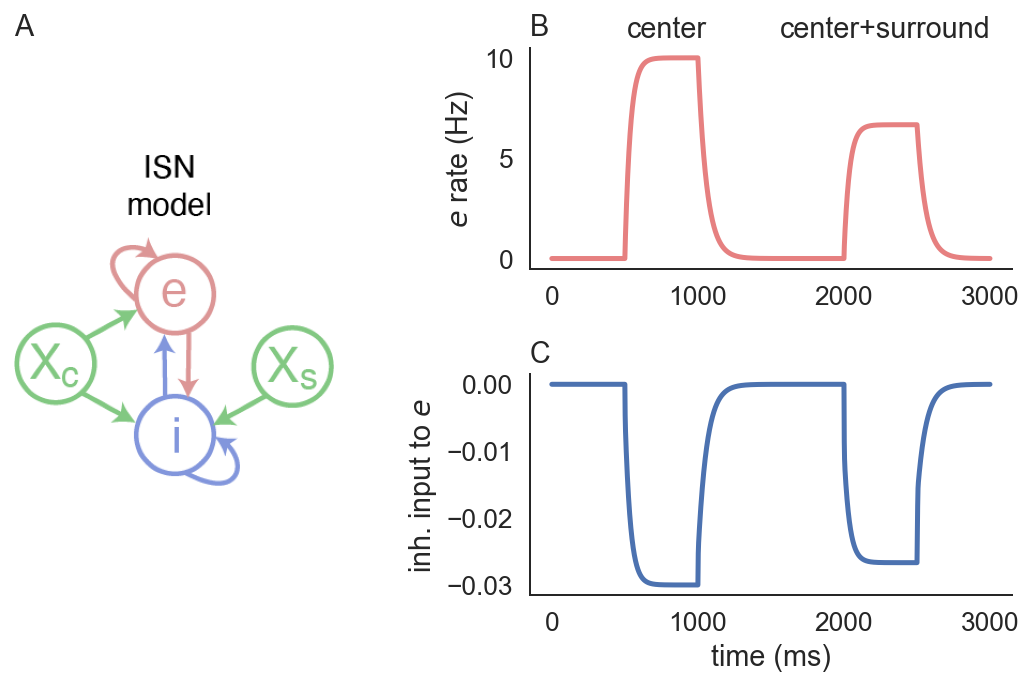

In [2]:
##### Now do the ISN model


# Define network params. 
# The w's are dimensionless
# Let's interpret time in ms
# and r in 1/ms=kHz.
wee=2
wei=-4
wie=5
wii=-7
Xe=20/1000
Xi=10/1000
taue=60
taui=12

# Build matrix and vector forms
W=np.array([[wee,wei],[wie,wii]])
X=np.zeros((2,len(time)))
tau=np.array([taue,taui])


# The times at which each stimulus turn on/off
tCenterOn=500
tCenterOff=1000
tSurrOn=2000
tSurrOff=2500

# Make stimulus
C=np.zeros(len(time))
S=np.zeros(len(time))
C[int(tCenterOn/dt):int(tCenterOff/dt)]=1
C[int(tSurrOn/dt):int(tSurrOff/dt)]=1
S[int(tSurrOn/dt):int(tSurrOff/dt)]=1
X[0,:]=C*Xe
X[1,:]=C*Xi+S*Xi

# Define f-I curve
def f(I):
    return (I)*(I>0)

# Euler loop
r=np.zeros((2,len(time)))
for i in range(len(time)-1):
    r[:,i+1]=r[:,i]+dt*(-r[:,i]+f(W@r[:,i]+X[:,i]))/tau

    

    
# Make figure
plt.subplots(figsize=(8,5))

# Get image for plot
plt.subplot(1,2,1)
# Get image for plot
try: 
    im = plt.imread('./ImageFiles/SurroundSuppDiagram2.png')
except:
    try:
        url = "https://raw.githubusercontent.com/RobertRosenbaum/ModelingNeuralCircuits/master/CodeFromBook/ImageFiles/SurroundSuppDiagram2.png"
        file = np.DataSource().open(url)
        im = plt.imread(file.name)
    except:
        im = 1.0+np.zeros([100,100,3],dtype=np.uint8)
plt.imshow(im,interpolation='hanning')
plt.axis('off')
plt.title('A',loc='left')



plt.subplot(2,2,2)
plt.plot(time,1000*r[0,:],color=[.9,.5,.5])
plt.text((tCenterOn+tCenterOff)/2+35,11,"center",ha='center')
plt.text((tSurrOn+tSurrOff)/2+35,11,"center+surround",ha='center')
#plt.xlabel('time (ms)')
plt.ylabel(r'$e$ rate (Hz)')
plt.title('B',loc='left')
sns.despine()

plt.subplot(2,2,4)
plt.plot(time,wei*r[1,:],'b')
plt.xlabel('time (ms)')
plt.ylabel(r'inh. input to $e$')
plt.title('C',loc='left')
sns.despine()



plt.tight_layout()

